In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm
from scipy.stats import shapiro
from scipy import stats
import statsmodels.api as sm
import warnings
import statsmodels.graphics.gofplots as smg
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import os
import gdown
import pandas as pd

# Create the output directory if it doesn't exist
output_directory = '/content'
os.makedirs(output_directory, exist_ok=True)

# Specify the output file path
train_output_file = '/content/Shirt Size Recommendation.csv'

# Specify the file ID and download URL
train_file_id = '1dxChShHrJxHy1eHoYGMp4rCOpAr8BWv4'
train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

# Download the file using gdown
gdown.download(train_download_url, train_output_file, quiet=False)

# Read the CSV file into a DataFrame
df = pd.read_csv(train_output_file)
df.head()


Downloading...
From: https://drive.google.com/uc?id=1dxChShHrJxHy1eHoYGMp4rCOpAr8BWv4
To: c:\content\Shirt Size Recommendation.csv
100%|██████████| 34.4k/34.4k [00:00<00:00, 273kB/s]


,Brand Name,Type,Size,Brand Size,Chest(cm),Front Length(cm),Across Shoulder(cm)
0,Roadster,Cotton,38,S,100.3,73.7,43.2
1,Roadster,Cotton,40,M,107.4,74.7,45.2
2,Roadster,Cotton,42,L,115.1,74.7,45.2
3,Roadster,Cotton,44,XL,122.7,76.5,49
4,Roadster,Cotton,46,XXL,130.3,82,50.8


In [4]:
df.rename(columns={'Chest(cm)': 'ld','Front Length(cm)':'pb','Across Shoulder(cm)':'lb'}, inplace=True)
df.head()

,Brand Name,Type,Size,Brand Size,ld,pb,lb
0,Roadster,Cotton,38,S,100.3,73.7,43.2
1,Roadster,Cotton,40,M,107.4,74.7,45.2
2,Roadster,Cotton,42,L,115.1,74.7,45.2
3,Roadster,Cotton,44,XL,122.7,76.5,49
4,Roadster,Cotton,46,XXL,130.3,82,50.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand Name  835 non-null    object
 1   Type        835 non-null    object
 2   Size        835 non-null    object
 3   Brand Size  835 non-null    object
 4   ld          835 non-null    object
 5   pb          835 non-null    object
 6   lb          830 non-null    object
dtypes: object(7)
memory usage: 45.8+ KB


In [6]:
var = df[['ld','pb','lb']]
for i in var:
    df[i]=pd.to_numeric(df[i], errors='coerce').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand Name  835 non-null    object 
 1   Type        835 non-null    object 
 2   Size        835 non-null    object 
 3   Brand Size  835 non-null    object 
 4   ld          834 non-null    float64
 5   pb          834 non-null    float64
 6   lb          829 non-null    float64
dtypes: float64(3), object(4)
memory usage: 45.8+ KB


In [7]:
df.isnull().sum()

Brand Name    1
Type          1
Size          1
Brand Size    1
ld            2
pb            2
lb            7
dtype: int64

In [8]:
dfnew=df.dropna()
dfnew.isnull().sum()

Brand Name    0
Type          0
Size          0
Brand Size    0
ld            0
pb            0
lb            0
dtype: int64

In [9]:
dfnew['Size'] = dfnew['Size'].astype(float).round().astype(int, errors='ignore')
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 835
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand Name  829 non-null    object 
 1   Type        829 non-null    object 
 2   Size        829 non-null    int32  
 3   Brand Size  829 non-null    object 
 4   ld          829 non-null    float64
 5   pb          829 non-null    float64
 6   lb          829 non-null    float64
dtypes: float64(3), int32(1), object(3)
memory usage: 48.6+ KB


C:\Users\Riska Lathifah\AppData\Local\Temp\ipykernel_34128\4105726221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Size'] = dfnew['Size'].astype(float).round().astype(int, errors='ignore')


In [10]:
df_encoded = pd.get_dummies(dfnew, columns=['Type'], prefix=['Type'])

In [11]:
df_encoded.describe()

,Size,ld,pb,lb,Type_ Cotton,Type_ cotton,Type_Polyster
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,42.114596,114.031001,75.971291,47.326538,0.927624,0.066345,0.006031
std,3.737477,35.738908,4.735861,3.770188,0.259266,0.249034,0.077474
min,33.000000,11.800000,64.000000,33.500000,0.000000,0.000000,0.000000
25%,40.000000,104.900000,73.700000,44.500000,1.000000,0.000000,0.000000
50%,42.000000,111.800000,76.200000,47.000000,1.000000,0.000000,0.000000
75%,44.000000,119.400000,78.700000,49.500000,1.000000,0.000000,0.000000
max,60.000000,1067.000000,119.400000,62.200000,1.000000,1.000000,1.000000


# EDA

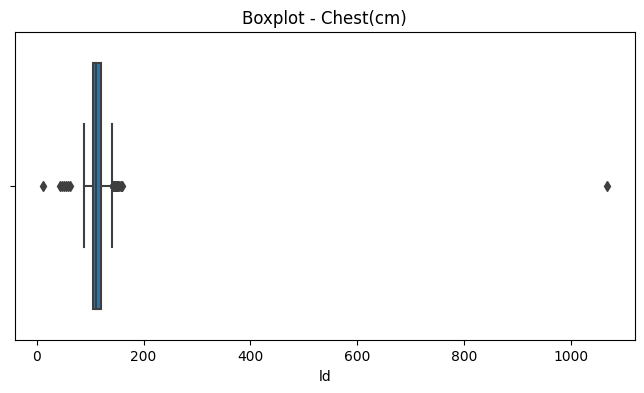

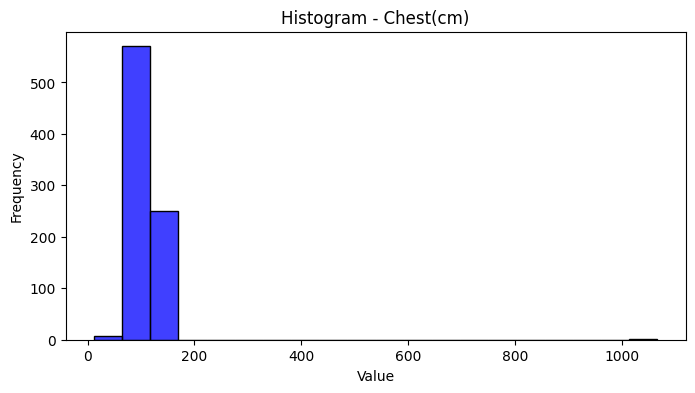

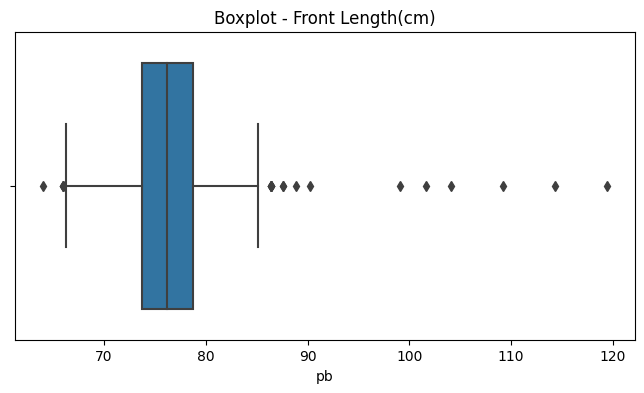

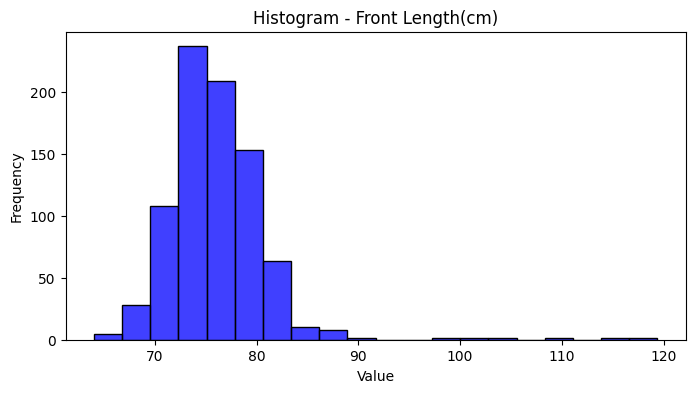

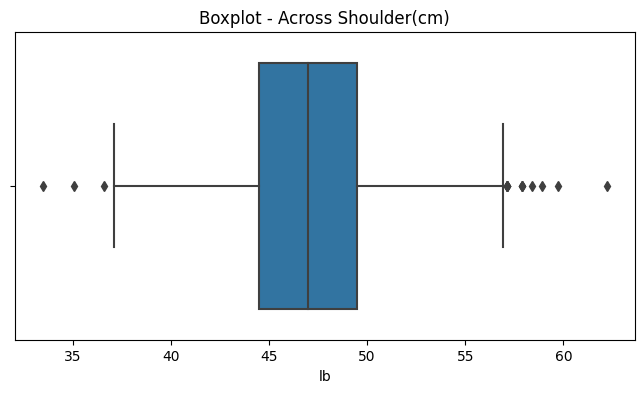

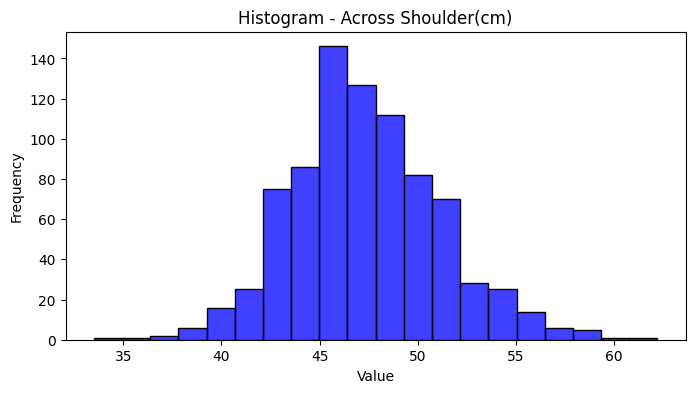

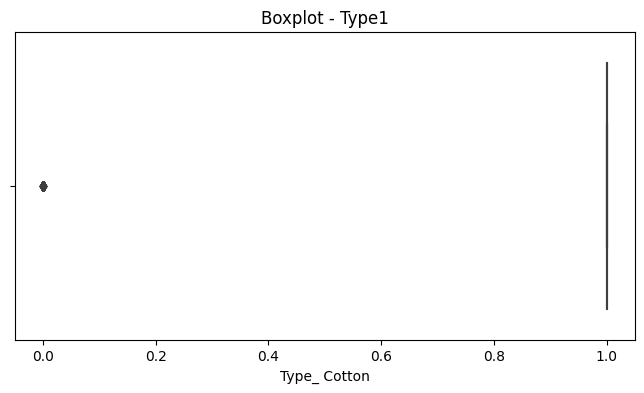

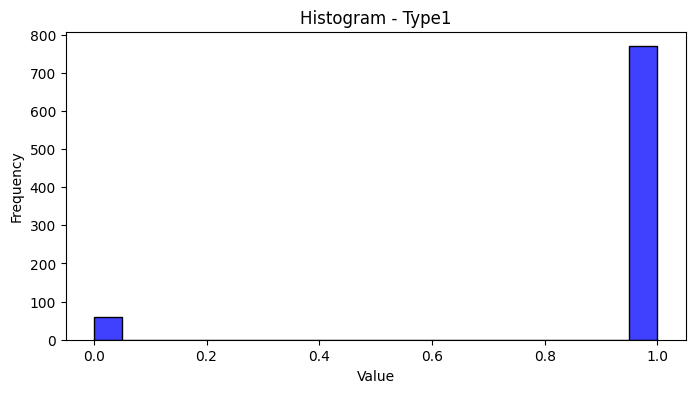

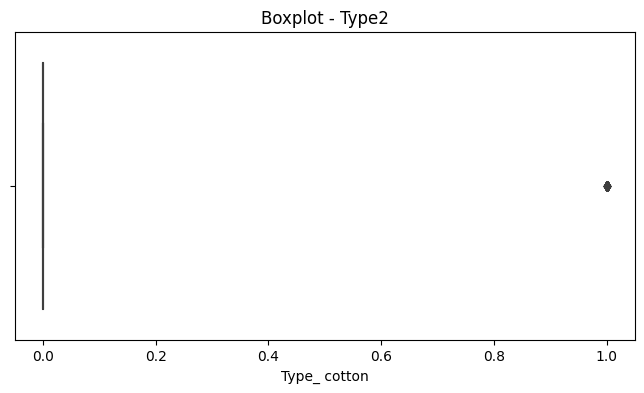

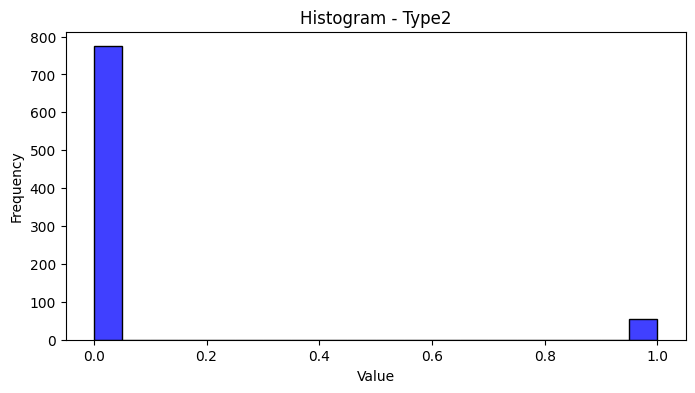

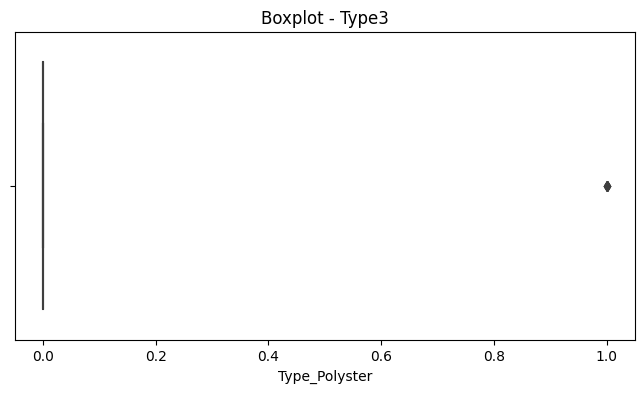

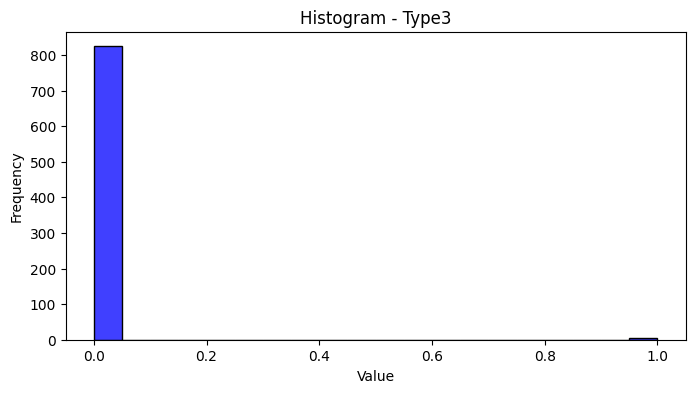

In [12]:
var = df_encoded[['ld', 'pb', 'lb','Type_ Cotton',	'Type_ cotton',	'Type_Polyster']]
var_name = ['Chest(cm)', 'Front Length(cm)', 'Across Shoulder(cm)','Type1','Type2','Type3']

if len(var.columns) == len(var_name):
    for i in range(len(var.columns)):
        # Boxplot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=var[var.columns[i]])
        plt.title(f'Boxplot - {var_name[i]}')
        plt.show()

        # Histogram
        plt.figure(figsize=(8, 4))
        sns.histplot(var[var.columns[i]], bins=20, kde=False, color='blue')
        plt.title(f'Histogram - {var_name[i]}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
else:
    print("The number of variables and variable names do not match.")


# Handling Outlier

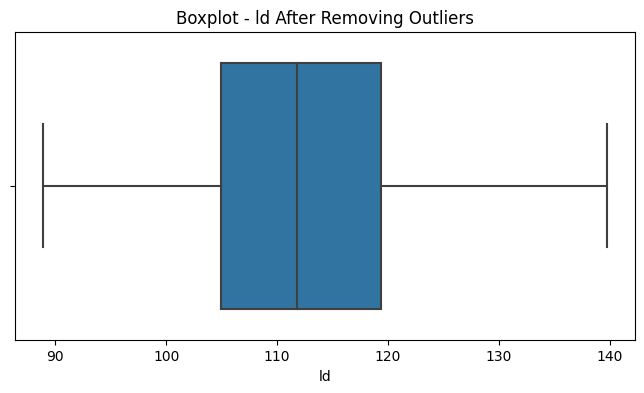

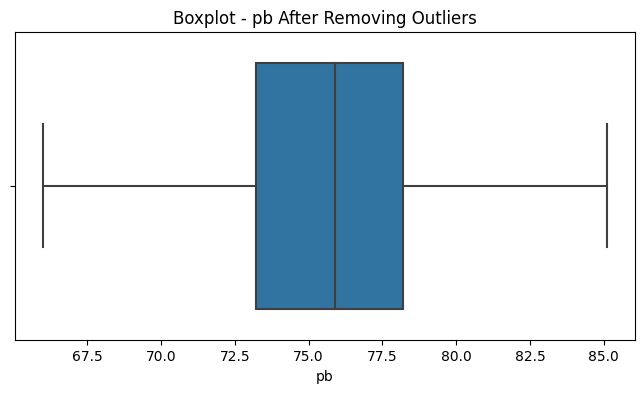

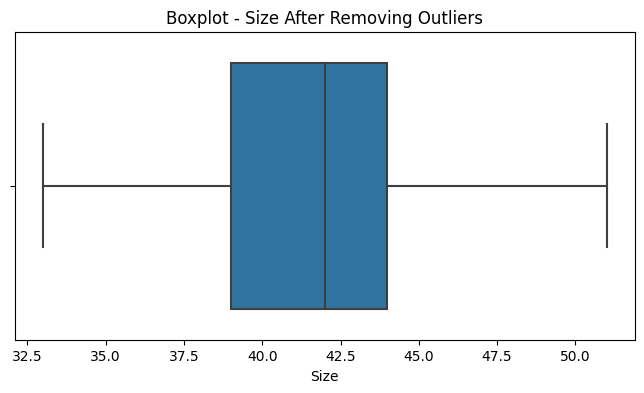

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
var_names = ['ld','pb','Size']

# Create a new DataFrame without outliers
df2 = df_encoded.copy()
for variable in var_names:
    Q1 = df2[variable].quantile(0.25)
    Q3 = df2[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Use boolean indexing to filter the DataFrame without outliers for the current variable
    df2 = df2[(df2[variable] >= lower_bound) & (df2[variable] <= upper_bound)]

for variable in var_names:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=variable, data=df2)
    plt.title(f'Boxplot - {variable} After Removing Outliers')
    plt.show()

# Reset the index of df2
df2.reset_index(drop=True, inplace=True)

In [26]:
df_encoded.describe()

,Size,ld,pb,lb,Type_ Cotton,Type_ cotton,Type_Polyster
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,42.114596,114.031001,75.971291,47.326538,0.927624,0.066345,0.006031
std,3.737477,35.738908,4.735861,3.770188,0.259266,0.249034,0.077474
min,33.000000,11.800000,64.000000,33.500000,0.000000,0.000000,0.000000
25%,40.000000,104.900000,73.700000,44.500000,1.000000,0.000000,0.000000
50%,42.000000,111.800000,76.200000,47.000000,1.000000,0.000000,0.000000
75%,44.000000,119.400000,78.700000,49.500000,1.000000,0.000000,0.000000
max,60.000000,1067.000000,119.400000,62.200000,1.000000,1.000000,1.000000


In [25]:
df2.describe()

,Size,ld,pb,lb,Type_ Cotton,Type_ cotton,Type_Polyster
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.00000,781.000000
mean,41.682458,112.156594,75.461588,46.971063,0.930858,0.06274,0.006402
std,3.037638,9.968293,3.538113,3.379369,0.253858,0.24265,0.079807
min,33.000000,88.900000,66.000000,33.500000,0.000000,0.00000,0.000000
25%,39.000000,104.900000,73.200000,44.500000,1.000000,0.00000,0.000000
50%,42.000000,111.800000,75.900000,47.000000,1.000000,0.00000,0.000000
75%,44.000000,119.400000,78.200000,49.000000,1.000000,0.00000,0.000000
max,51.000000,139.700000,85.100000,57.100000,1.000000,1.00000,1.000000


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand Name     781 non-null    object 
 1   Size           781 non-null    int32  
 2   Brand Size     781 non-null    object 
 3   ld             781 non-null    float64
 4   pb             781 non-null    float64
 5   lb             781 non-null    float64
 6   Type_ Cotton   781 non-null    uint8  
 7   Type_ cotton   781 non-null    uint8  
 8   Type_Polyster  781 non-null    uint8  
dtypes: float64(3), int32(1), object(2), uint8(3)
memory usage: 36.0+ KB


# uji kolmogorov smirnov

In [23]:
var=df2[['ld','pb','lb']]
for column in var.columns:
    # Check if the array is constant
    if np.all(var[column] == var[column][0]):
        print(f"{column} is a constant array.")
    else:
        # Perform the Shapiro-Wilk test
        stat, p_value = shapiro(var[column])
        print(f'Shapiro-Wilk Test for {column}: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test for ld: Statistic=0.9866585731506348, p-value=1.509872618044028e-06
Shapiro-Wilk Test for pb: Statistic=0.9898707866668701, p-value=3.244075924158096e-05
Shapiro-Wilk Test for lb: Statistic=0.9898377656936646, p-value=3.136588566121645e-05


Data normal, gagal tolak h0

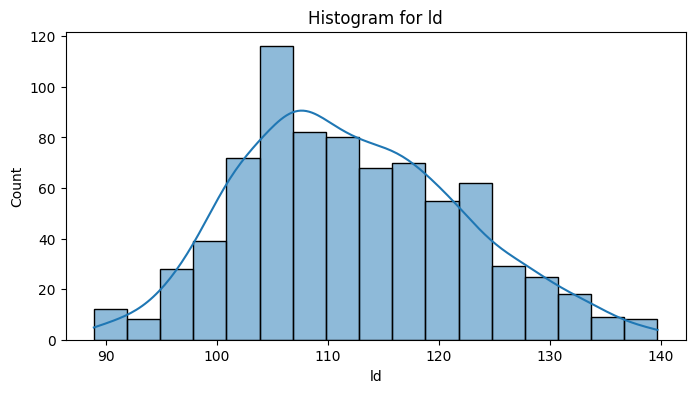

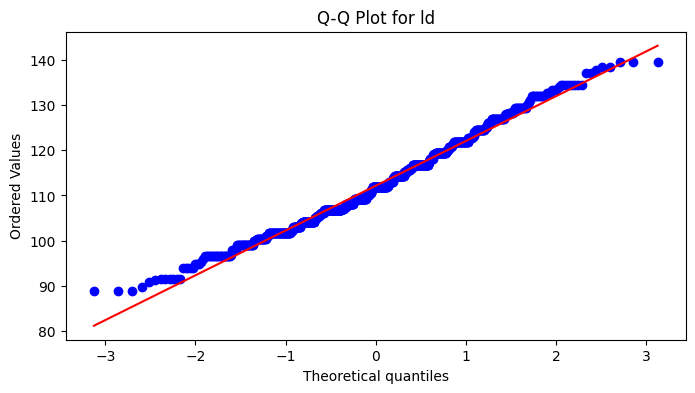

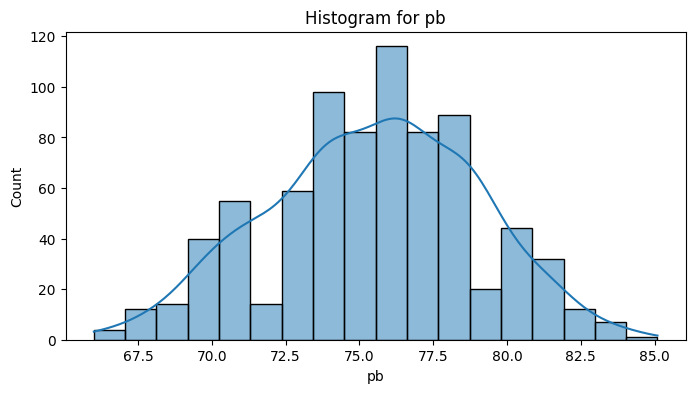

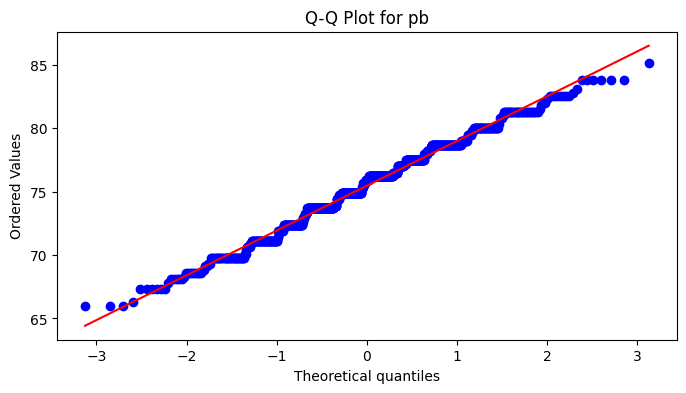

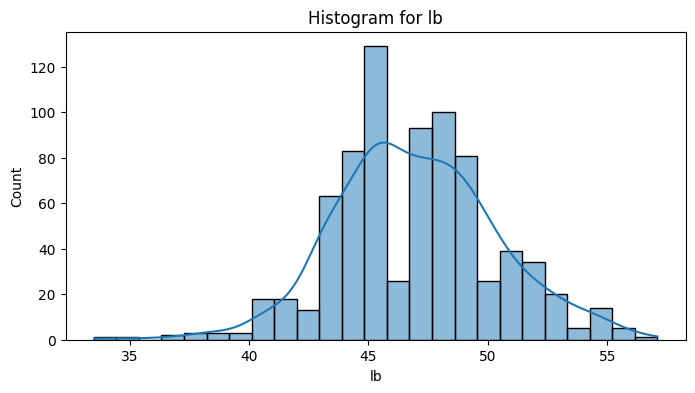

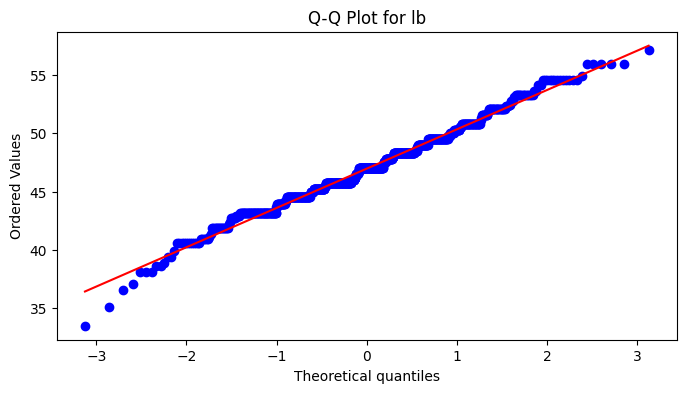

In [22]:
varbaru=df2[['ld','pb','lb']]
for column in varbaru.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(varbaru[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

    plt.figure(figsize=(8, 4))
    stats.probplot(varbaru[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

In [28]:
# Uji homoskedastisitas residual
bp_stat, bp_p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, X)
print(f'Uji Breusch-Pagan (Homoskedastisitas): Statistik={bp_stat}, p-value={bp_p_value}')

# Interpretasi uji homoskedastisitas
if bp_p_value > 0.05:
    print("Tidak ada bukti yang cukup untuk menolak asumsi homoskedastisitas pada residual.")
    print("Kesimpulan: Terdapat homoskedastisitas pada model regresi linear.")
else:
    print("Terdapat bukti yang cukup untuk menolak asumsi homoskedastisitas pada residual.")
    print("Kesimpulan: Terdapat heteroskedastisitas pada model regresi linear.")

NameError: name 'residuals' is not defined

NameError: name 'residuals' is not defined

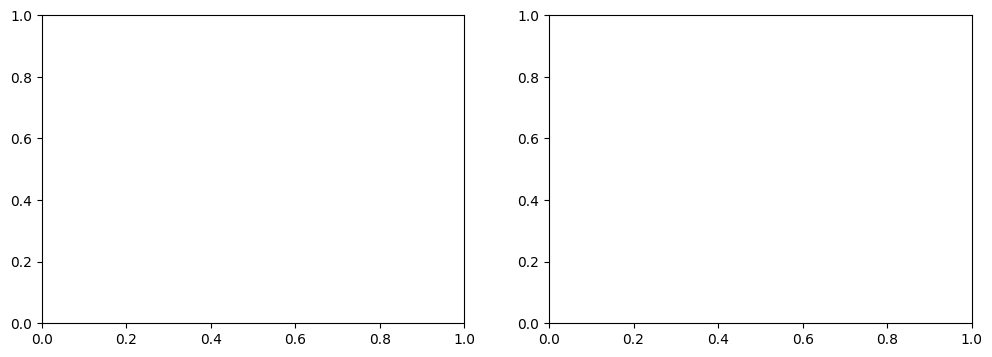

In [29]:
# Plot histogram dan Q-Q plot residual
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
smg.qqplot(residuals, line='45', ax=axes[0])
smg.ProbPlot(residuals).qqplot(line='s', ax=axes[1])
axes[0].set_title('Q-Q Plot Residuals')
axes[1].set_title('Probability Plot Residuals')
plt.show()

# MODEL

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [31]:
df2.head()

,Brand Name,Size,Brand Size,ld,pb,lb,Type_ Cotton,Type_ cotton,Type_Polyster
0,Roadster,38,S,100.3,73.7,43.2,1,0,0
1,Roadster,40,M,107.4,74.7,45.2,1,0,0
2,Roadster,42,L,115.1,74.7,45.2,1,0,0
3,Roadster,44,XL,122.7,76.5,49.0,1,0,0
4,Roadster,46,XXL,130.3,82.0,50.8,1,0,0


In [32]:
x =df2.drop(['Brand Name','Brand Size','Type_ Cotton',	'Type_ cotton','Type_Polyster','Size'],axis=1)
y =df2['Size']

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [34]:
X_train1.shape, X_test1.shape

((546, 3), (235, 3))

# Melatih MODEL

In [35]:
linreg=LinearRegression()

# Fitting Model

In [36]:
linreg.fit(X_train1,y_train1)

LinearRegression()

# Prediksi dataset

In [37]:
y_pred1_linreg = linreg.predict(X_test1)


In [39]:
coef = linreg.coef_
intercept = linreg.intercept_
print(f'Koefisien: {coef}')
print(f'Intercept: {intercept}')
y_pred_train = linreg.predict(X_train1)
r_squared_train = r2_score(y_train1, y_pred_train)
print(f'R-squared (data latih): {r_squared_train}')


Koefisien: [0.22998187 0.0363091  0.10978148]
Intercept: 7.983981604528566
R-squared (data latih): 0.7832990792865822


# Model Pickle

In [ ]:
import pickle

models = linreg

In [ ]:
with open('modelnew.pkl','wb') as file:
    pickle.dump(models, file)